In [1]:

import pandas as pd
df=pd.read_csv("adm_data.csv")
df


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
df.isnull()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False


In [5]:
df.loc[df['Chance of Admit '] >= 0.80,'Chance of Admit '] = 1
df.loc[df['Chance of Admit '] < 0.80,'Chance of Admit '] = 0
df['Chance of Admit ']

0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit , Length: 400, dtype: float64

In [7]:
x = df[['Serial No.','GRE Score','TOEFL Score','University Rating',
        'SOP', 'LOR ','CGPA','Research']] 
y = df[['Chance of Admit ']] 
from sklearn.model_selection import train_test_split     
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.25, random_state=0)


In [9]:
x = df[['Serial No.','GRE Score','TOEFL Score','University Rating',
        'SOP', 'LOR ','CGPA','Research']] 
y = df[['Chance of Admit ']] 
from sklearn.model_selection import train_test_split    
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.25, random_state=0)

In [11]:
print(x_train.head())
print(x_train.size)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
250         251        320          104                  3  3.0   2.5  8.57   
63           64        315          107                  2  4.0   3.0  8.50   
312         313        311          107                  4  4.5   4.5  9.00   
159         160        297          100                  1  1.5   2.0  7.90   
283         284        321          111                  3  2.5   3.0  8.90   

     Research  
250         1  
63          1  
312         1  
159         0  
283         1  
2400


In [13]:
print(y_train.head())
print(y_train.size)

     Chance of Admit 
250               0.0
63                0.0
312               0.0
159               0.0
283               1.0
300


In [15]:
print(x_test.head())
print(x_test.size)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
132         133        309          105                  5  3.5   3.5  8.56   
309         310        308          110                  4  3.5   3.0  8.60   
341         342        326          110                  3  3.5   3.5  8.76   
196         197        306          105                  2  3.0   2.5  8.26   
246         247        316          105                  3  3.0   3.5  8.73   

     Research  
132         0  
309         0  
341         1  
196         0  
246         0  
800


In [17]:
print(y_test.head())
print(y_test.size)

     Chance of Admit 
132               0.0
309               0.0
341               0.0
196               0.0
246               0.0
100


In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 2)  
model.fit(x_train, y_train) #train model

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [21]:
#test model using testing data and store in y_pred
y_pred = model.predict(x_test) 
print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 1.]


In [23]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[65  6]
 [ 2 27]]


In [25]:

from sklearn.metrics import accuracy_score 
acc=accuracy_score(y_test,y_pred)
print("accuracy= ",acc)
from sklearn.metrics import precision_score 
p=precision_score(y_test,y_pred)
print("precision= ",p)
from sklearn.metrics import recall_score 
r=recall_score(y_test,y_pred)
print("recall= ",r)
from sklearn.metrics import f1_score 
f1=f1_score(y_test,y_pred)
print("f1-measure= ",f1)

accuracy=  0.92
precision=  0.8181818181818182
recall=  0.9310344827586207
f1-measure=  0.8709677419354839


In [27]:
from sklearn.metrics import classification_report 
cr = classification_report(y_test,y_pred) 
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.92      0.94        71
         1.0       0.82      0.93      0.87        29

    accuracy                           0.92       100
   macro avg       0.89      0.92      0.91       100
weighted avg       0.93      0.92      0.92       100



In [29]:
import matplotlib.pyplot as plt 
feature_names = df.columns[:7] 
print(feature_names, end='')
class_names = [str(x) for x in model.classes_] 
class_names

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA'],
      dtype='object')

['0.0', '1.0']

[Text(0.5, 0.8333333333333334, 'CGPA <= 8.845\nentropy = 0.915\nsamples = 300\nvalue = [201, 99]\nclass = 0.0'),
 Text(0.25, 0.5, 'GRE Score <= 320.5\nentropy = 0.29\nsamples = 197\nvalue = [187, 10]\nclass = 0.0'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 0.093\nsamples = 168\nvalue = [166, 2]\nclass = 0.0'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.85\nsamples = 29\nvalue = [21, 8]\nclass = 0.0'),
 Text(0.75, 0.5, 'CGPA <= 9.165\nentropy = 0.573\nsamples = 103\nvalue = [14, 89]\nclass = 1.0'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.894\nsamples = 45\nvalue = [14, 31]\nclass = 1.0'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 58\nvalue = [0, 58]\nclass = 1.0')]

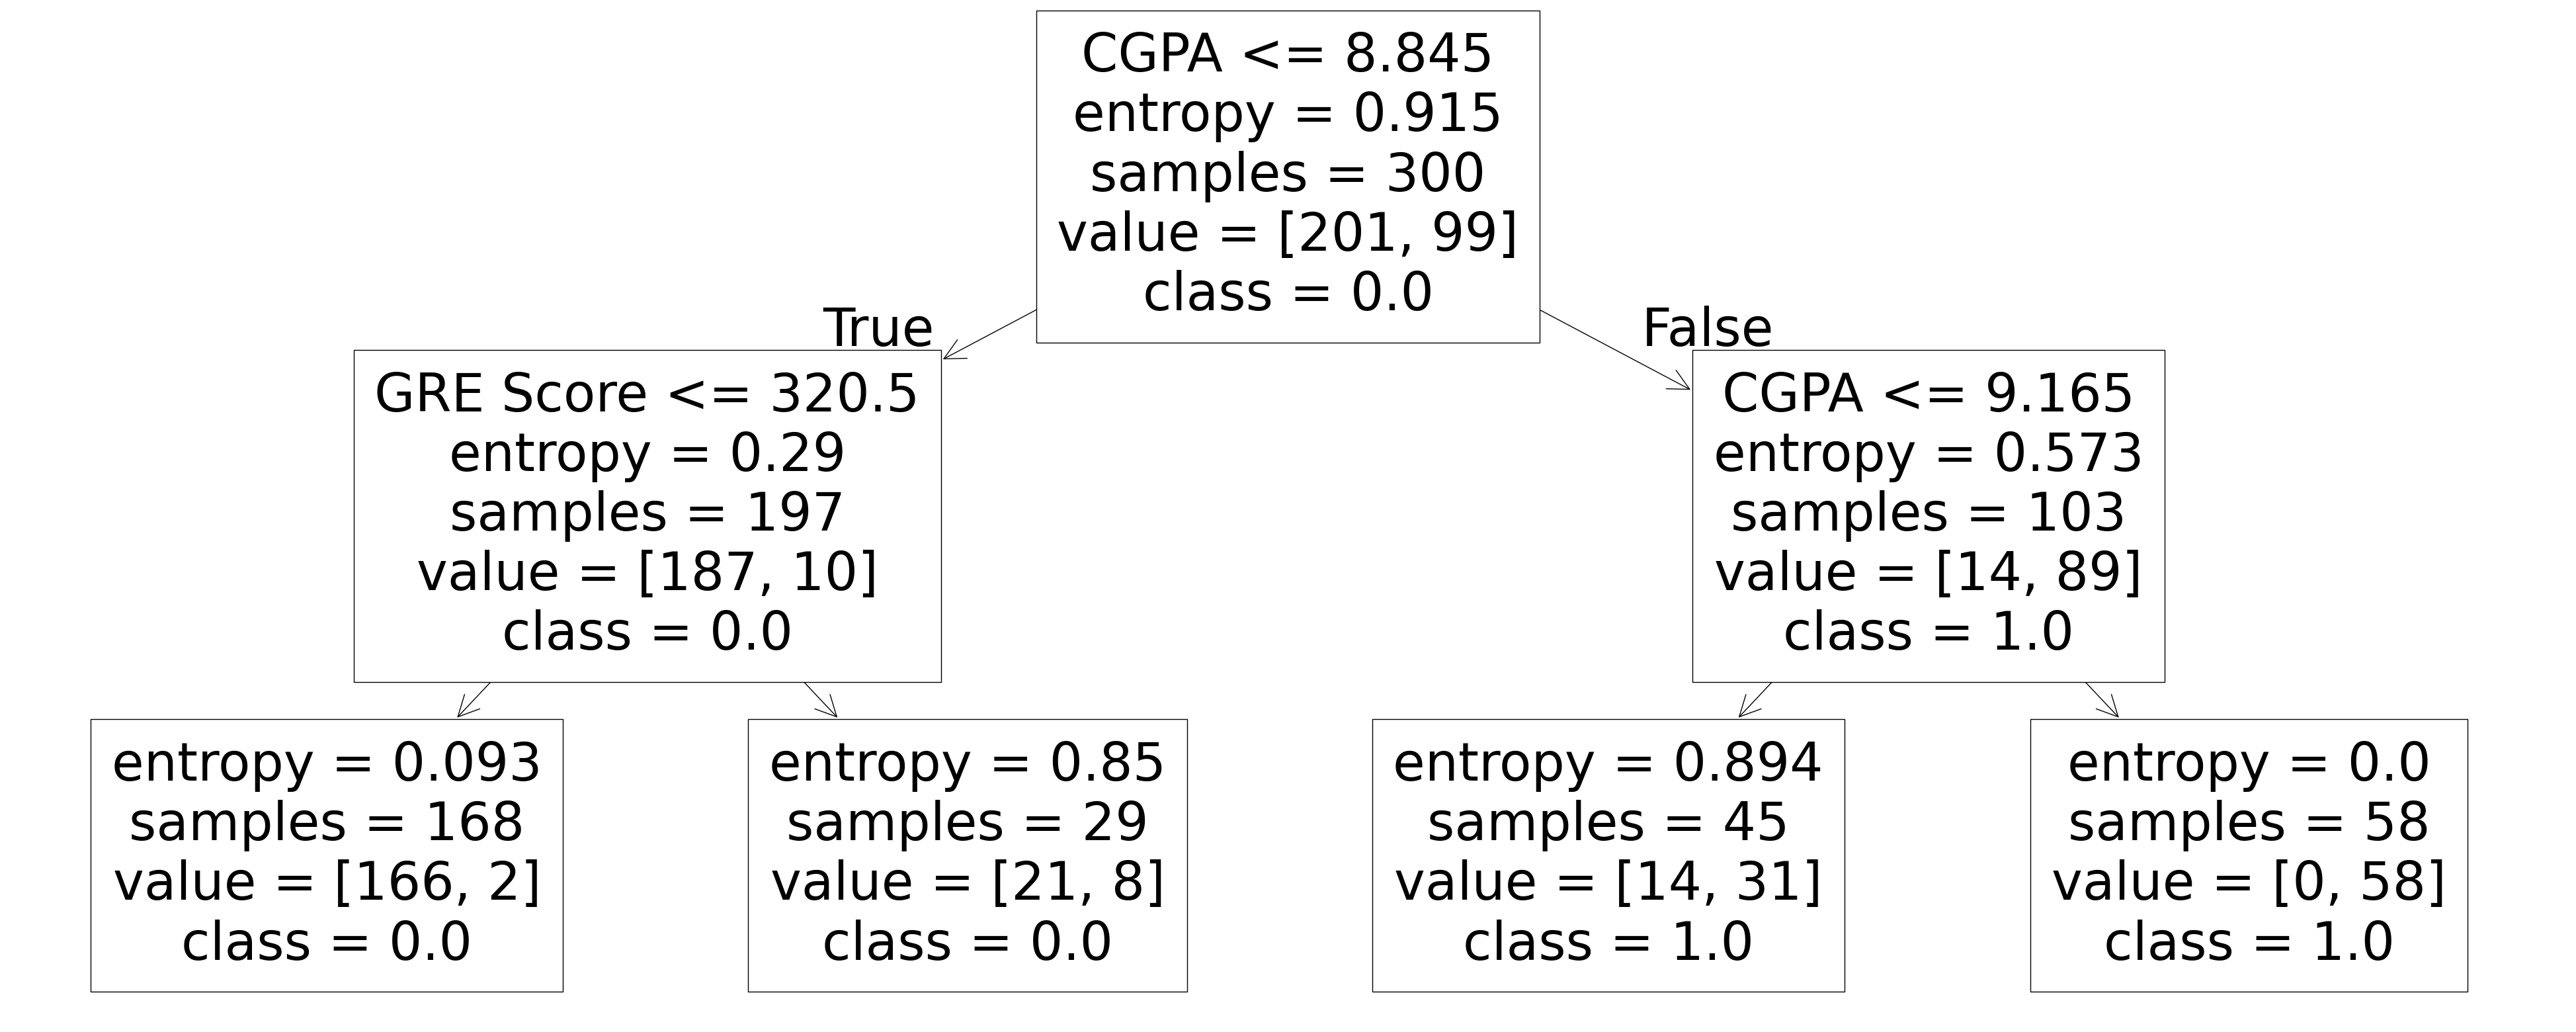

In [31]:
from sklearn.tree import plot_tree 
fig = plt.figure(figsize=(50,20)
plot_tree(model, feature_names=feature_names, class_names=class_names) 